In [97]:
!pip install pandas
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.7 MB 7.5 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.7 MB 5.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.7 MB 4.7 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.7 MB 4.4 MB/s eta 0:00:02
   ------------------- -------------------- 4.2/8.7 MB 4.2 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.7 MB 4.2 MB/s eta 0:00:01
   -------------------------- ------------- 5.8/8.7 MB 4.2 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.7 MB 4.1 MB/s eta 0:00:01
   ---------------------------------- ----- 7.6/8.7 MB 4.1 MB/s eta 0:00:01
   -------------------------------------- - 8.4/8.7 MB 4.0 MB/s eta 0:00:01
   ------------

<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
C:\Users\rithy\AppData\Local\Temp\ipykernel_69372\2195099141.py:4: SyntaxWarning: invalid escape sequence '\h'
  data = pd.read_csv('C:\housing.csv')


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


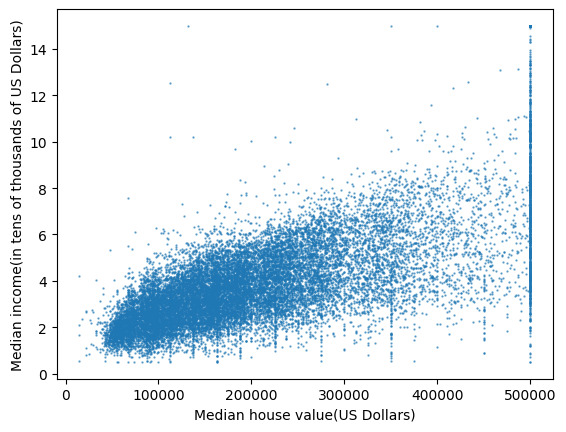

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('C:\housing.csv')
print(data.head())
X = data.iloc[:,8]
Y = data.iloc[:,7]
plt.scatter(X, Y,alpha=0.6,s=.5)
plt.xlabel('Median house value(US Dollars)')
plt.ylabel('Median income(in tens of thousands of US Dollars)')
plt.show()

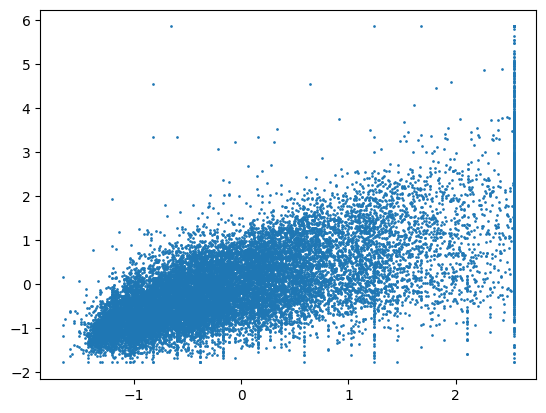

In [91]:
#Normalization
X_mean, X_std = X.mean(), X.std()
Y_mean, Y_std = Y.mean(), Y.std()

X_norm = (X - X_mean) / X_std
Y_norm = (Y - Y_mean) / Y_std
#Plotting normalized data
plt.scatter(X_norm,Y_norm,s=.9)

In [87]:
# Building the model
m = 0
c = 0

L = 0.1  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X


# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_norm + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X_norm * (Y_norm - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y_norm - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.6880752079585477 1.2576832464924577e-16


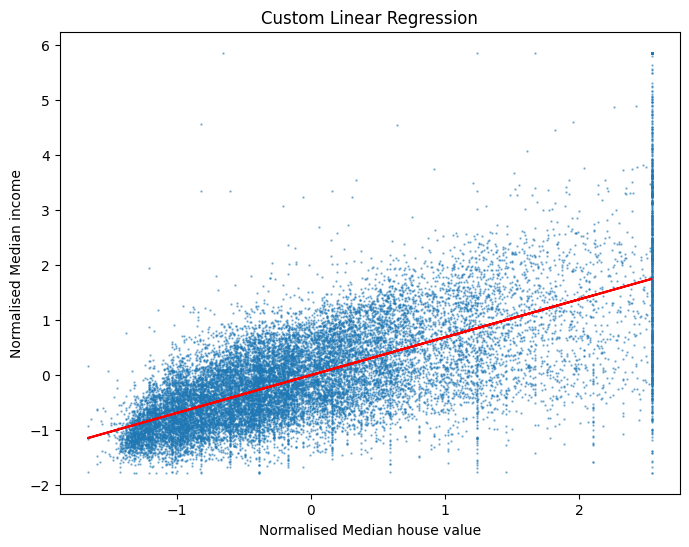

In [112]:
# Making predictions and plotting graph
Y_pred_norm = m * X_norm + c
plt.figure(figsize=(8, 6))
plt.scatter(X_norm, Y_norm, alpha=0.5,s=.5, label='Data') 
plt.xlabel('Normalised Median house value')
plt.ylabel('Normalised Median income')
plt.title('Custom Linear Regression')
plt.plot(X_norm, Y_pred_norm, color='red', label='Fitted Line')
plt.show()

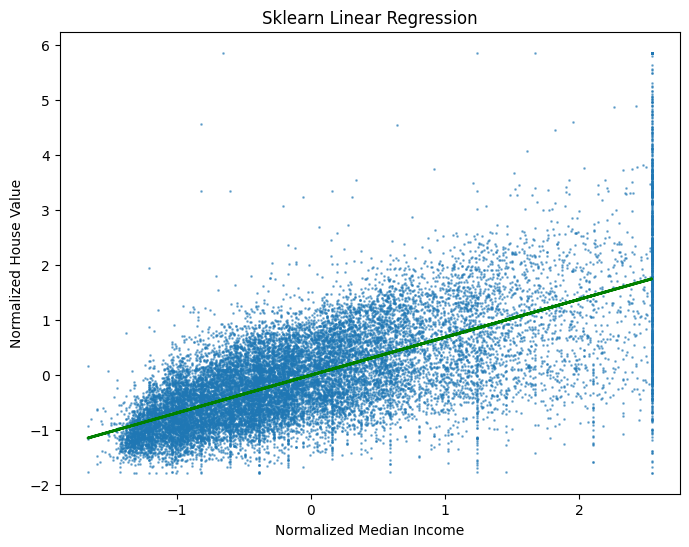

In [104]:
from sklearn.linear_model import LinearRegression
#reg model
reg=LinearRegression()
X_norm_df = X_norm.to_frame()  # Converts Series to single-column DataFrame
#Fitting the data
reg.fit(X_norm_df, Y_norm)
#Predicting the data
Y_pred_sklearn = reg.predict(X_norm_df)

# plotting the graph
plt.figure(figsize=(8, 6))
plt.scatter(X_norm, Y_norm, alpha=0.5,s=.9)
plt.plot(X_norm, Y_pred_sklearn, color='green', label='Sklearn Model', linewidth=2)
plt.xlabel('Normalized Median Income')
plt.ylabel('Normalized House Value')
plt.title('Sklearn Linear Regression')
plt.show()

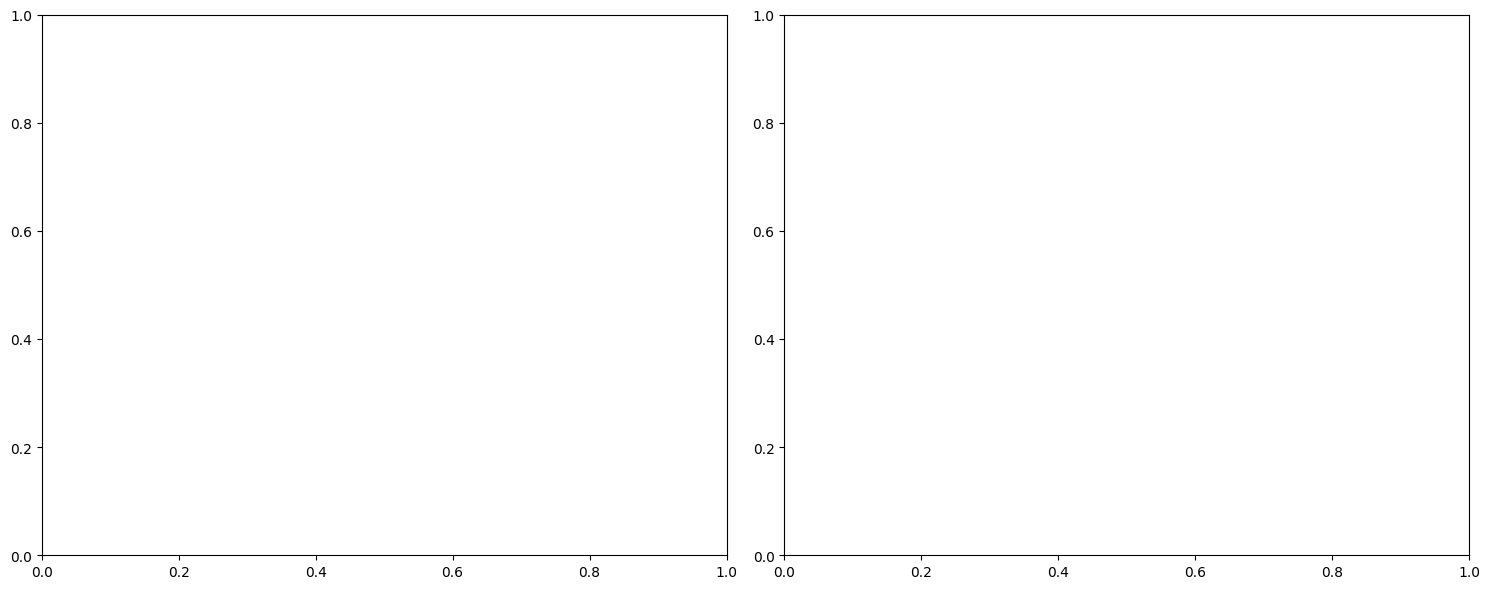

Final parameters: m=0.688075, c=0.000000


In [111]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Store history during gradient descent
m_history = []
c_history = []
cost_history = []

# Reset and run gradient descent with history tracking
m = 0
c = 0
L = 0.1
epochs = 100  # Fewer epochs for smoother animation
n = float(len(X_norm))

for i in range(epochs): 
    Y_pred = m * X_norm + c
    cost = sum((Y_norm - Y_pred)**2) / (2*n)
    
    # Store history
    m_history.append(m)
    c_history.append(c)
    cost_history.append(cost)
    
    D_m = (-2/n) * sum(X_norm * (Y_norm - Y_pred))
    D_c = (-2/n) * sum(Y_norm - Y_pred)
    m = m - L * D_m
    c = c - L * D_c

# Create animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

def animate(frame):
    ax1.clear()
    ax2.clear()
    
    # Left plot: Data and evolving line
    ax1.scatter(X_norm, Y_norm, alpha=0.3, s=10, color='blue', label='Data')
    Y_pred_current = m_history[frame] * X_norm + c_history[frame]
    ax1.plot(X_norm, Y_pred_current, 'r-', linewidth=3, 
             label=f'Epoch {frame}\nm={m_history[frame]:.4f}, c={c_history[frame]:.4f}')
    ax1.set_xlabel('Normalized House Value')
    ax1.set_ylabel('Normalized Income')
    ax1.set_title('Gradient Descent Learning')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Right plot: Cost decreasing
    ax2.plot(range(frame+1), cost_history[:frame+1], 'g-', linewidth=2)
    ax2.plot(frame, cost_history[frame], 'ro', markersize=8)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Cost')
    ax2.set_title(f'Cost: {cost_history[frame]:.6f}')
    ax2.grid(True, alpha=0.3)

# Run animation
anim = FuncAnimation(fig, animate, frames=len(m_history), 
                    interval=100, repeat=True, blit=False)

plt.tight_layout()
plt.show()

print(f"Final parameters: m={m_history[-1]:.6f}, c={c_history[-1]:.6f}")

